In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the Dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

##### Exploratory data Analysis

In [6]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


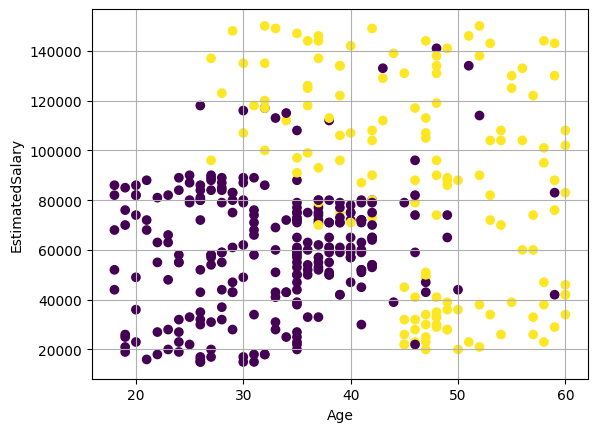

In [7]:
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'],c=y)

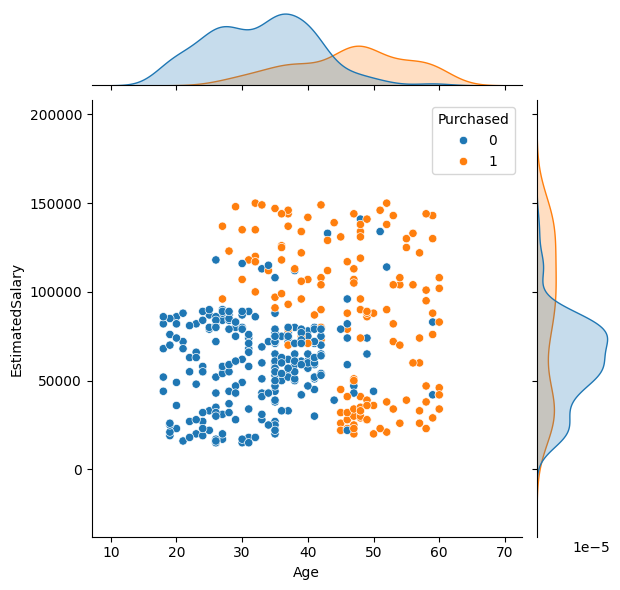

In [8]:
sns.jointplot(x='Age',y='EstimatedSalary',data=df,hue='Purchased')

In [9]:
np.unique(y)

array([0, 1], dtype=int64)

In [10]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

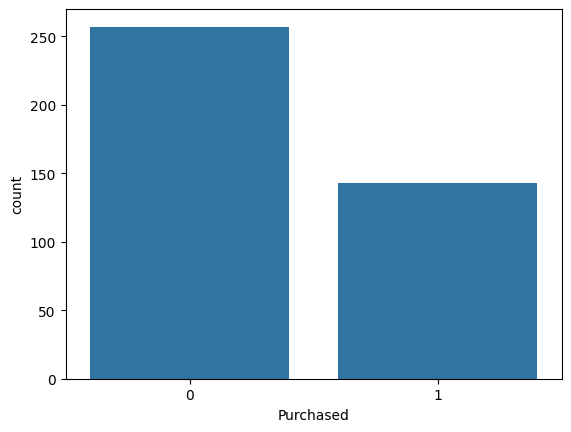

In [11]:
sns.countplot(x=y)

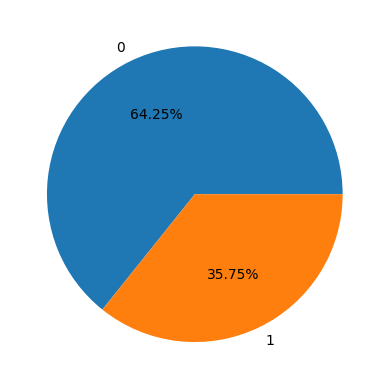

In [12]:
plt.pie(y.value_counts(), labels=y.value_counts().index,autopct='%2.2f%%');

### Features Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler


In [14]:
scaler = MinMaxScaler()

In [15]:
x_scaled= scaler.fit_transform(x)

In [16]:
x_scaled

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148],
       [0.19047619, 0.27407407],
       [0.04761905, 0.52592593],
       [0.33333333, 0.02222222],
       [0.        , 0.4962963 ],
       [0.26190476, 0.48148148],
       [0.69047619, 0.07407407],
       [0.64285714, 0.08148148],
       [0.66666667, 0.0962963 ],
       [0.71428571, 0.1037037 ],
       [0.64285714, 0.05185185],
       [0.69047619, 0.25185185],
       [0.71428571, 0.19259259],
       [0.64285714, 0.05185185],
       [0.66666667, 0.05925926],
       [0.69047619, 0.03703704],
       [0.73809524, 0.0962963 ],
       [0.69047619, 0.11111111],
       [0.26190476, 0.20740741],
       [0.30952381, 0.02222222],
       [0.

# Cross Validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

# build the tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree = DecisionTreeClassifier(random_state=0,criterion = 'entropy')

In [22]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred = tree.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred)

0.91

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

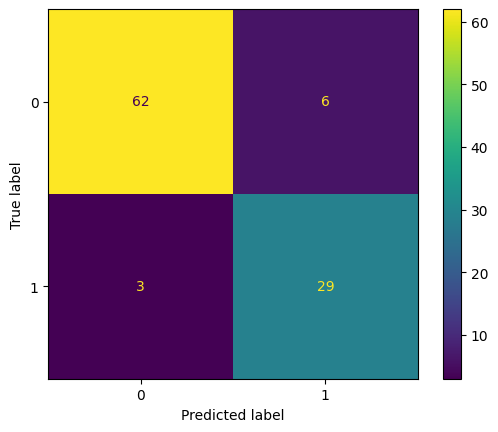

In [27]:
cm = confusion_matrix(y_test,y_pred)
    
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [30]:
# Accuracy of class :- 0 / sensitivity 
r0 = 62/68
r0

0.9117647058823529

In [31]:
## Accuracy of class :- 1 / specifity ##
r1 = 28/32
r1

0.875

In [32]:
## positive predictive value -0 ##
p0 = 62/66
p0

0.9393939393939394

In [33]:
# Negative predictive value -1 
p1 = 28/34
p1

0.8235294117647058

In [34]:
# F1 score means harmonic mean
f0 = 2 * p0 * r0 / (p0 + r0)
f0

0.9253731343283583

In [35]:
f1 = 2 * p1 * r1 / (p1 + r1)
f1

0.8484848484848485

### Feature Importance

<BarContainer object of 2 artists>

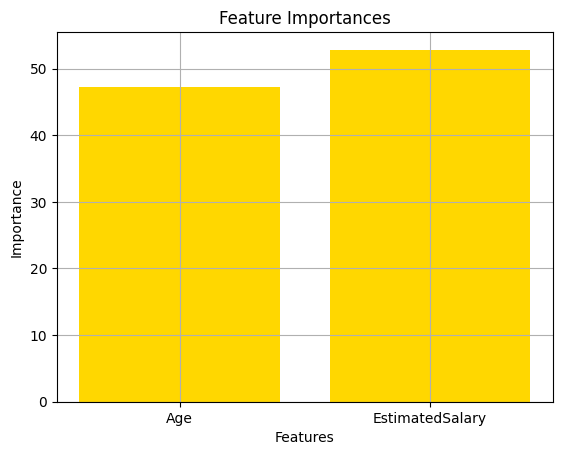

In [36]:
plt.title('Feature Importances')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns,tree.feature_importances_*100,color = 'gold')


In [37]:
tree.feature_importances_

array([0.47180519, 0.52819481])

In [38]:
### Plot the tree

In [39]:
from sklearn.tree import plot_tree

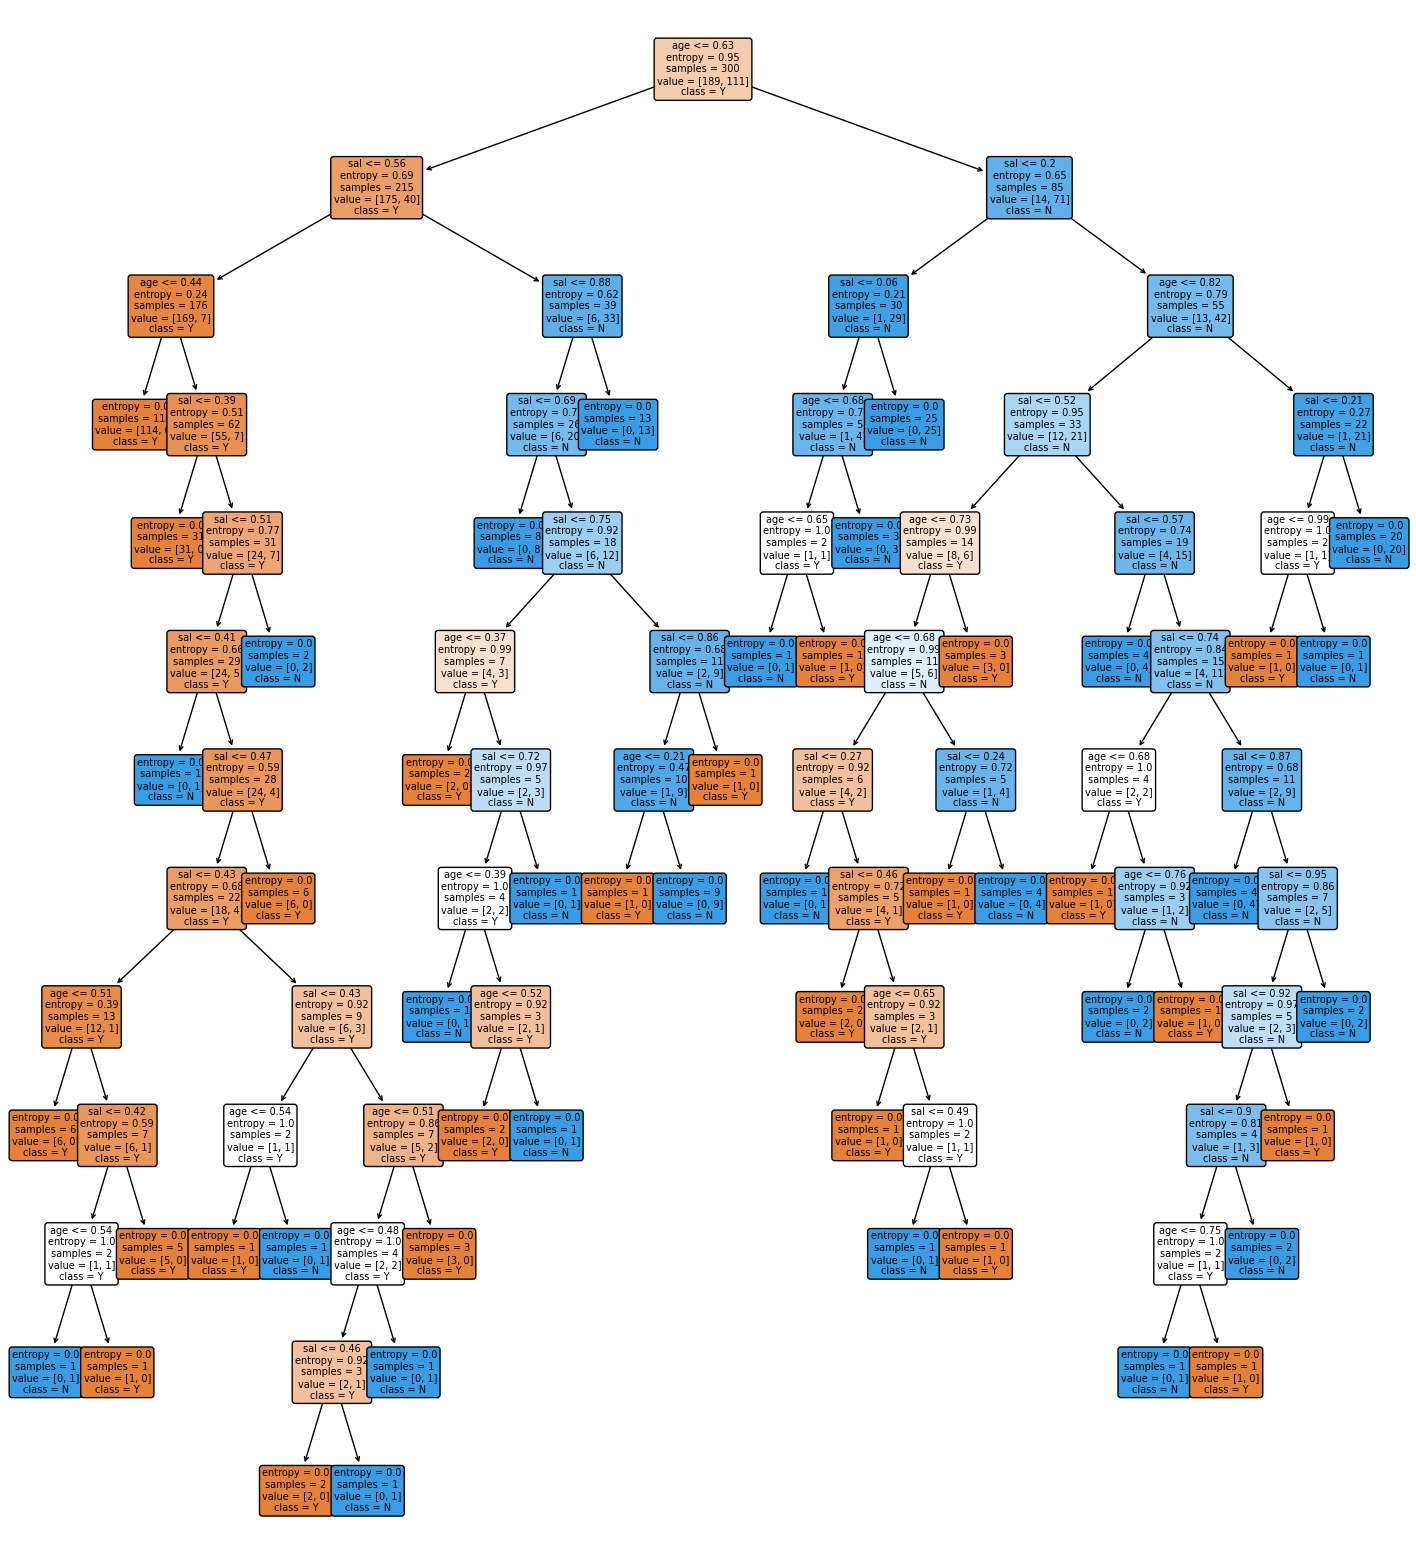

In [40]:
plt.figure(figsize = (18,20))
plot_tree(tree,fontsize = 7,filled = True,class_names = ['Y','N'],
         feature_names = ['age','sal'],rounded = True,precision = 2);

In [41]:
### predict the unseen data

In [42]:
new = pd.DataFrame({
    'Age' : [45,22,58],
    'EstimatedSalary' : [78000,45600,134000]
})

In [43]:
new

,Age,EstimatedSalary
0,45,78000
1,22,45600
2,58,134000


In [44]:
tree.predict(scaler.transform(new))

array([0, 0, 1], dtype=int64)